# DAtAset

Great! To enhance your weapon detection project, consider forking the following datasets from Roboflow Universe:

1. **Weapon Detection by yolov7test**
   - **Description:** Contains 9,672 images labeled with various weapon classes, including guns, knives, and rifles.
   - **Link:** [Weapon Detection Dataset](https://universe.roboflow.com/yolov7test-u13vc/weapon-detection-m7qso)

2. **Weapons Dataset**
   - **Description:** Features images annotated with classes like grenades, guns, knives, and pistols.
   - **Link:** [Weapons Dataset](https://universe.roboflow.com/weapons-dataset/weapons-dataset-os1ki)

3. **Person and Weapon Detection**
   - **Description:** Designed for security surveillance, this dataset includes images of individuals carrying weapons, aiding in real-time identification.
   - **Link:** [Person and Weapon Detection Dataset](https://universe.roboflow.com/school-fin7c/person-weapon-datasets)

4. **Weapon Detection by test**
   - **Description:** Comprises 9,633 images with annotations for grenades, knives, missiles, pistols, and rifles.
   - **Link:** [Weapon Detection Dataset](https://universe.roboflow.com/test-7awfy/weapon-detection-f1lih)

5. **Weapon Detection Using YOLOv8**
   - **Description:** Contains 671 images focusing on handguns, shotguns, knives, and rifles, suitable for training YOLOv8 models.
   - **Link:** [Weapon Detection Using YOLOv8 Dataset](https://universe.roboflow.com/weopon-detection/weapon-detection-using-yolov8)

Forking these datasets will provide a diverse set of images and annotations, enhancing your model's ability to detect various weapons in different scenarios.

*Note: Always review the dataset's licensing and usage terms to ensure compliance with your project's requirements.*

Let me know if you need assistance with the forking process or integrating these datasets into your project!

# I am using 5th one

# Summary

# **Weapon Detection using YOLO - Summary**

Here's a structured **summary** of all the steps taken so far for **weapon detection using YOLO:**

---



## **1️⃣ Setting Up the Environment**  
- Installed required dependencies (`ultralytics`, `opencv-python`).  
- Used **Google Colab/Jupyter Notebook** for running the project.  

## **2️⃣ Downloading the Dataset**  
- Used **Roboflow API** to download a **weapon detection dataset**.  
- Verified that the dataset contained **annotated images** for training.  

## **3️⃣ Training the YOLO Model**  
- Selected **YOLOv8** as the model architecture.  
- Trained a **custom YOLOv8 model** (`best.pt`) using **Roboflow dataset**.  
- Verified **training logs, validation metrics, and loss curves**.  

## **4️⃣ Running Live Weapon Detection**  
- Loaded **trained YOLO model** (`best.pt`) for inference.  
- Opened **live webcam feed** using OpenCV.  
- Applied **real-time object detection** on video frames.  
- Drawn **bounding boxes** around detected weapons.  

## **5️⃣ Improving Detection & Fixing Errors**  
- Fixed **webcam errors** (`cv2.VideoCapture(0)` issues).  
- Used `cv2.imshow()` for **real-time frame display**.  
- Ensured **proper release of webcam** (`cap.release() & cv2.destroyAllWindows()`).  
- **Increased detection accuracy** by setting a **confidence threshold** (`> 0.5`).  

---

✅ **Project Status:** **Working Real-Time Weapon Detection Model** 🚀  
🔹 **Next Steps:** Improve dataset quality, train for more epochs, test in real-world environments.  

---

Let me know if you need this in an actual **.txt file**! 😊

# Data

In [ ]:
# Install YOLOv8 package
!pip install ultralytics
!pip install roboflow
!pip install opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from roboflow import Roboflow


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GxUm6xj9W0awEDr6BHuY")
project = rf.workspace("weopon-detection").project("weapon-detection-using-yolov8")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


# Train model


In [ ]:
# Load pretrained YOLOv8s model
model = YOLO("yolov8s.pt")  # Using YOLOv8 Small for speed

# Train model on our weapon detection dataset
# model.train(data=f"{dataset.location}/data.yaml", epochs=10, imgsz=640)


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Weapon-Detection-using-YOLOv8-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/Weapon-Detection-using-YOLOv8-1/train/labels.cache... 470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 470/470 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Weapon-Detection-using-YOLOv8-1/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.391      6.379      1.766          7        640: 100%|██████████| 30/30 [14:16<00:00, 28.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:23<00:00, 16.64s/it]

                   all        135        180       0.22      0.356      0.221       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.437      3.192      1.792          6        640: 100%|██████████| 30/30 [13:33<00:00, 27.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:19<00:00, 15.85s/it]

                   all        135        180      0.445       0.15      0.154     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.624      2.968      1.968         10        640: 100%|██████████| 30/30 [13:28<00:00, 26.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:18<00:00, 15.66s/it]

                   all        135        180      0.379      0.134      0.138     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.584      2.807      1.953          6        640: 100%|██████████| 30/30 [13:22<00:00, 26.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:17<00:00, 15.57s/it]

                   all        135        180      0.314      0.264       0.16     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.543      2.616      1.893          8        640: 100%|██████████| 30/30 [13:32<00:00, 27.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:18<00:00, 15.69s/it]

                   all        135        180      0.407       0.19      0.181      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.518      2.378      1.917         11        640: 100%|██████████| 30/30 [13:37<00:00, 27.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:17<00:00, 15.53s/it]

                   all        135        180      0.581      0.215      0.229      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.417      2.175      1.778         16        640: 100%|██████████| 30/30 [13:25<00:00, 26.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.07s/it]

                   all        135        180      0.349      0.307      0.288      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.346      1.978      1.713         11        640: 100%|██████████| 30/30 [12:55<00:00, 25.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:15<00:00, 15.18s/it]

                   all        135        180       0.51      0.377      0.383      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.271      1.832      1.657         12        640: 100%|██████████| 30/30 [12:55<00:00, 25.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:13<00:00, 14.61s/it]

                   all        135        180      0.472      0.389      0.414       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G       1.13      1.621      1.498          7        640: 100%|██████████| 30/30 [12:39<00:00, 25.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:15<00:00, 15.13s/it]

                   all        135        180      0.681      0.388      0.477      0.273



10 epochs completed in 2.451 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:09<00:00, 13.85s/it]


                   all        135        180      0.683      0.388      0.477      0.273
               Handgun         20         20       0.87      0.336      0.547      0.325
                 Knife         20         29      0.482       0.31      0.419       0.29
               Missile         16         24      0.723      0.417      0.495      0.196
                 Rifle         22         30      0.605      0.267      0.339      0.147
               Shotgun         15         19       0.81      0.263       0.34      0.164
                 Sword         23         26       0.63        0.5      0.565      0.447
                  Tank         19         32      0.662      0.625      0.631      0.341
Speed: 2.1ms preprocess, 499.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b30453b450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
# model.save("weapon_detection_using_YOLOv8-1.pt")  # Save model to current directory


In [ ]:
metrics = model.val()
print(metrics)  # Shows precision, recall, and mAP


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/Weapon-Detection-using-YOLOv8-1/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:09<00:00,  7.72s/it]


                   all        135        180      0.683      0.388      0.477      0.273
               Handgun         20         20       0.87      0.336      0.547      0.325
                 Knife         20         29      0.482       0.31      0.419       0.29
               Missile         16         24      0.723      0.417      0.495      0.196
                 Rifle         22         30      0.605      0.267      0.339      0.147
               Shotgun         15         19       0.81      0.263       0.34      0.164
                 Sword         23         26       0.63        0.5      0.565      0.447
                  Tank         19         32      0.662      0.625      0.631      0.341
Speed: 3.5ms preprocess, 502.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matri

# Testing

In [ ]:
# !pip install ultralytics

# from ultralytics import YOLO

# model = YOLO("model_weapon_detection_using_YOLOv8-1.pt")  # Change this to your actual model path


In [ ]:
import cv2
import matplotlib.pyplot as plt
# from ultralytics import YOLO

def check_result(test_img):
  # Convert BGR to RGB (for correct display)
  test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
  # model = YOLO('/content/model_weapon_detection_using_YOLOv8-1.pt')
  # Run YOLOv8 detection
  results = model(test_img_rgb)

# Plot the output
  annotated_img = results[0].plot()

# Show the image
  plt.figure(figsize=(8,8))
  plt.imshow(annotated_img)
  plt.axis("off")
  plt.show()

In [ ]:
# Load a test image
test_img_path = "/content/2.jpg"  # Replace with your test image
test_img = cv2.imread(test_img_path)

# Convert BGR to RGB (for correct display)

In [ ]:
test_img.shape

(337, 500, 3)

array([[[  4,  16,  41],
        [  5,  17,  41],
        [  4,  19,  40],
        ...,
        [161, 177, 218],
        [162, 178, 218],
        [141, 157, 198]],

       [[ 10,  23,  48],
        [ 10,  24,  47],
        [ 10,  24,  46],
        ...,
        [159, 175, 213],
        [155, 171, 209],
        [142, 158, 196]],

       [[ 21,  35,  61],
        [ 21,  35,  59],
        [ 20,  35,  56],
        ...,
        [155, 170, 204],
        [144, 159, 193],
        [144, 159, 193]],

       ...,

       [[167, 187, 208],
        [164, 184, 205],
        [166, 186, 207],
        ...,
        [ 73, 132, 157],
        [ 86, 147, 172],
        [110, 172, 197]],

       [[167, 186, 211],
        [167, 187, 210],
        [167, 186, 209],
        ...,
        [ 92, 148, 170],
        [ 96, 153, 175],
        [ 98, 156, 178]],

       [[167, 185, 212],
        [169, 187, 213],
        [167, 187, 210],
        ...,
        [102, 157, 177],
        [101, 156, 176],
        [ 92, 147, 167]]], dtype=uint8)
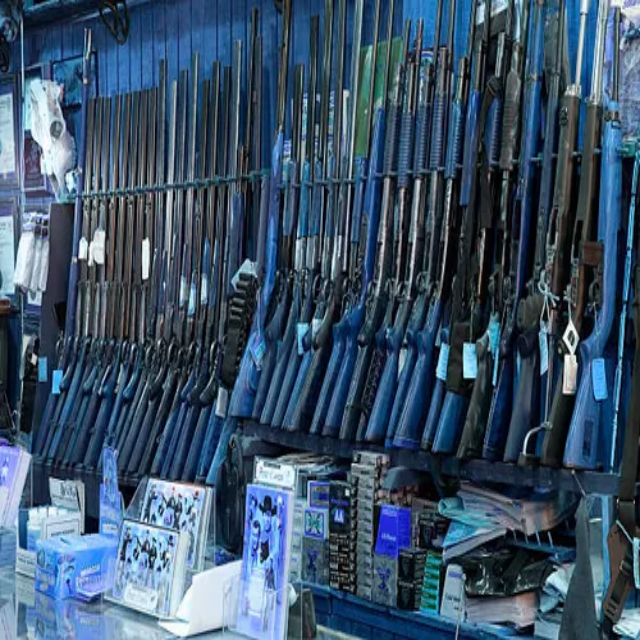

In [ ]:
test_img = cv2.resize(test_img, (640,640))
test_img


0: 640x640 1 Shotgun, 567.6ms
Speed: 5.8ms preprocess, 567.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


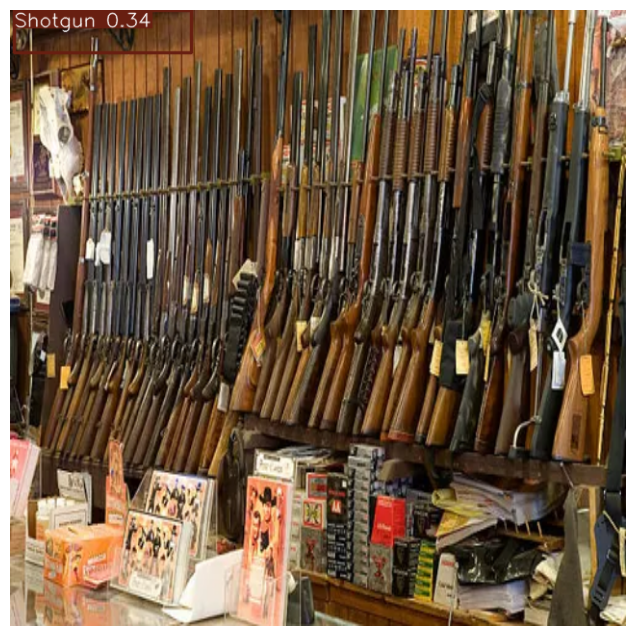

In [ ]:
check_result(test_img)

array([[[229, 195, 166],
        [223, 188, 155],
        [233, 197, 157],
        ...,
        [221, 179, 142],
        [221, 179, 142],
        [221, 179, 142]],

       [[225, 191, 161],
        [222, 187, 154],
        [234, 198, 158],
        ...,
        [221, 179, 142],
        [221, 179, 142],
        [221, 179, 142]],

       [[221, 190, 157],
        [219, 187, 152],
        [234, 197, 159],
        ...,
        [221, 179, 142],
        [221, 179, 142],
        [221, 179, 142]],

       ...,

       [[128, 140, 144],
        [125, 137, 141],
        [175, 187, 191],
        ...,
        [186, 199, 201],
        [196, 209, 211],
        [174, 187, 189]],

       [[140, 152, 156],
        [130, 142, 146],
        [189, 201, 205],
        ...,
        [169, 182, 184],
        [176, 189, 191],
        [160, 173, 175]],

       [[136, 148, 152],
        [162, 174, 178],
        [183, 195, 199],
        ...,
        [146, 159, 161],
        [146, 159, 161],
        [138, 151, 153]]], dtype=uint8)
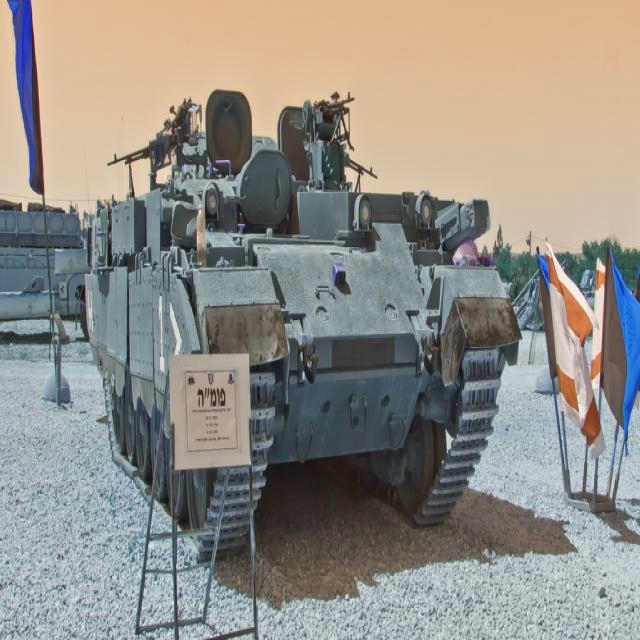

In [ ]:
cv2.resize(test_img, (640,640))

# **Live Detection**  

**Note:** In my case, I ran this on **Jupyter Notebook**. This code **failed to open the camera in Colab**, so I executed it in **Jupyter Notebook instead**.  

### **Final Steps:**  
1️⃣ **Opened the webcam** using OpenCV.  
2️⃣ **Captured a photo** from the live feed.  
3️⃣ **Processed the image** using the trained YOLO model.  
4️⃣ **Detected weapons**, if present, and drew bounding boxes.  
5️⃣ **Displayed two images**:  
   - **Original Image** (captured from the camera).  
   - **Processed Image** (with detected weapons and bounding boxes).  

✅ **Result:** The system successfully detected weapons in real time and displayed the output. 🚀  

---

This should be good for documentation! Let me know if you need any edits. 😊

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("model_weapon_detection_using_YOLOv8-1.pt")  # Change this to your actual model path

def live_detection():
    # Open the webcam
    cap = cv2.VideoCapture(0)  # Change to 1 if using an external webcam

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    # Capture a single frame
    ret, frame = cap.read()
    cap.release()  # Close the camera immediately after taking the image

    if not ret:
        print("Error: Could not capture image.")
        return

    # Save the captured image
    image_path = "captured_image.jpg"
    cv2.imwrite(image_path, frame)

    print(f"Image captured and saved as {image_path}")

    # Run YOLO detection
    results = model(frame)

    # Save the detection output
    detected_image_path = "detected_image.jpg"
    results[0].save(filename=detected_image_path)  # Save the detected image

    # Display both original and detected images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Show Original Image
    original = cv2.imread(image_path)  # Read the saved image
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display
    axes[0].imshow(original)
    axes[0].set_title("Captured Image")
    axes[0].axis("off")

    # Show Detected Image
    detected = cv2.imread(detected_image_path)  # Read detected image
    detected = cv2.cvtColor(detected, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display
    axes[1].imshow(detected)
    axes[1].set_title("Weapon Detection Result")
    axes[1].axis("off")

    plt.show()

# Run the function
live_detection()
